In [1]:
import torch
import numpy as np
import gymnasium as gym

import sys
sys.path.append('../../..')
from tools.trainer import Trainer
from tools.logger import Logger
from environments.hockey_wrapper import HockeyWrapper
from TD3 import TD3Agent

In [2]:
env_string = "Pendulum-v1"

In [3]:
if env_string == "Hockey":
    env = HockeyWrapper(mode="normal", opponent="weak")
else:
    env = gym.make(env_string)

In [4]:
agent = TD3Agent(env.observation_space, env.action_space)
trainer = Trainer()

In [5]:
ep_rewards = trainer.train(env, agent, n_episodes=30000, test_every=100, noise=0.2)

Step 101/30000:
                    test reward: -1396.76
                    mean reward: -1481.21, max reward: -911.96
                    Avg. step count: 200.0, Avg ep duration: 0.056s
                    Avg. critic loss: 0.27, Avg. actor loss: 12.67
                    Avg. train duration: 0.244s
            
Step 201/30000:
                    test reward: -1284.75
                    mean reward: -1325.11, max reward: -771.58
                    Avg. step count: 200.0, Avg ep duration: 0.053s
                    Avg. critic loss: 0.14, Avg. actor loss: 17.78
                    Avg. train duration: 0.233s
            
Step 301/30000:
                    test reward: -1076.51
                    mean reward: -1198.51, max reward: -7.07
                    Avg. step count: 200.0, Avg ep duration: 0.053s
                    Avg. critic loss: 0.18, Avg. actor loss: 27.53
                    Avg. train duration: 0.233s
            
Step 401/30000:
                    test reward: -8

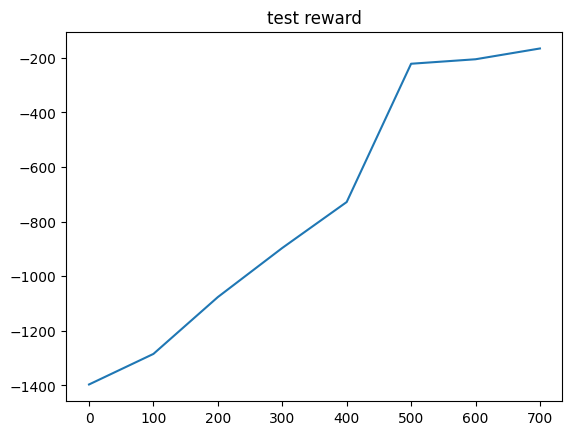

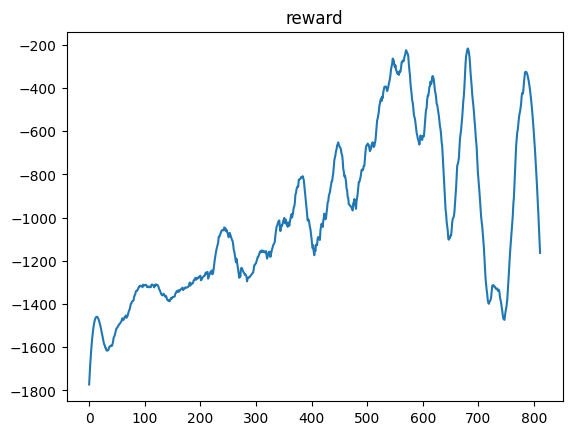

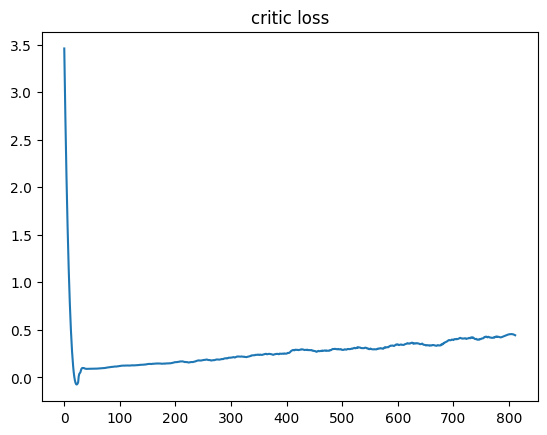

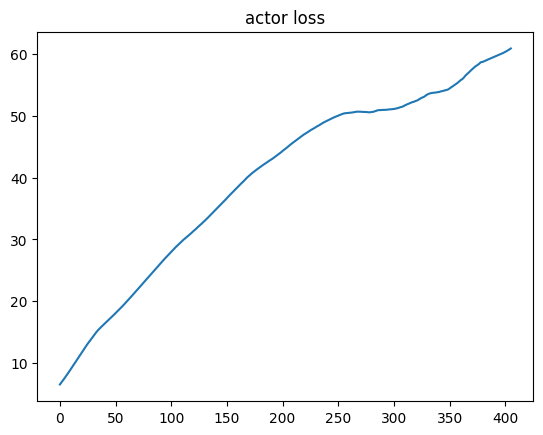

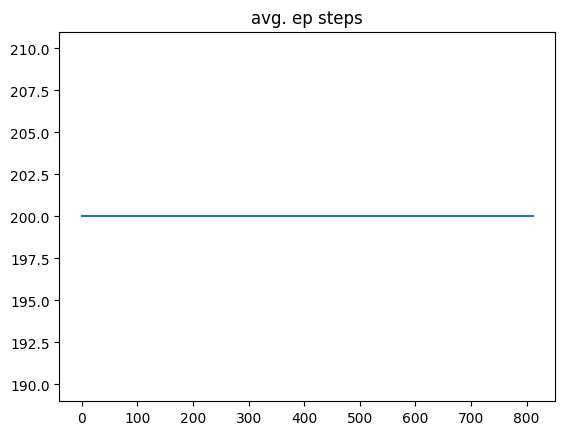

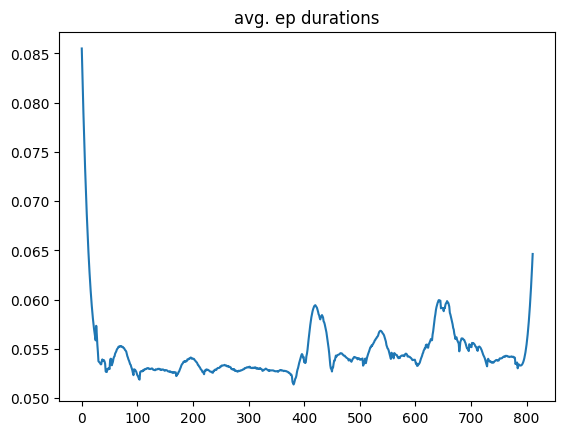

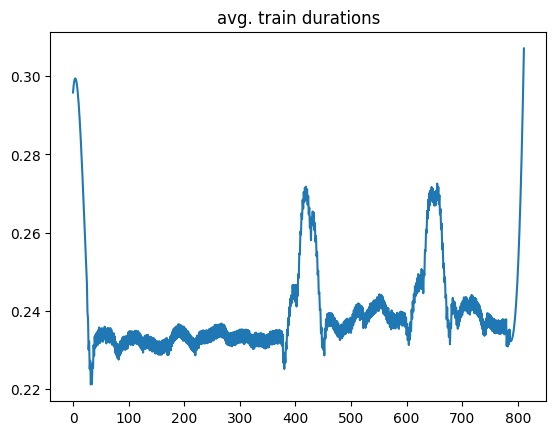

In [6]:
trainer.logger.plot()

In [7]:
def play(env_string, agent, n_episodes=10, noise=0):
    if env_string == 'Hockey':
        env = HockeyWrapper(mode='normal', opponent='weak')
        render = True
    else:
        env = gym.make(env_string, render_mode='human')
        render = False
    steps, rewards, observations, actions = Trainer.run(env, agent, n_episodes=n_episodes, noise=noise, render=True, store_transitions=False)
    env.close()
    return steps, rewards, observations, actions

In [8]:
steps, rewards, observations, actions = play(env_string, agent, n_episodes=1, noise=0)
print(np.mean(rewards))

-130.57571495216993


In [ ]:
trainer.logger.save("logs/pendulum_td3.npy")

In [ ]:
# torch.save(agent.state(), 'checkpoint_hockey.pth')

In [ ]:
# agent_state = torch.load('checkpoint_hockey.pth')
# agent.restore_state(agent_state)